In [1]:
import torch
import os 
import numpy as np
from albumentations.augmentations import transforms
from albumentations.core.composition import Compose, OneOf
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import cv2

alpha=0.5,alpha_affine=0.5,sigma=5,p=1

In [2]:
transformations = Compose([
                transforms.HorizontalFlip(p=0.5),
                transforms.ElasticTransform(alpha=1.1,alpha_affine=0.5,sigma=5,p=1),
                ToTensorV2()
            ])

In [3]:
image = '/home/LUNG_DATA/Image/LIDC-IDRI-0001/0001_nodule0_slice03.npy'
mask = '/home/LUNG_DATA/Mask/LIDC-IDRI-0001/0001_mask0_slice03.npy'

In [4]:
image0= np.load(image)
mask0 = np.load(mask)

In [5]:
image0 = image0.reshape(512,512,1)
mask0 = mask0.reshape(512,512,1)

In [6]:
print(image0.shape,mask0.shape)

(512, 512, 1) (512, 512, 1)


In [8]:
mask0 = mask0.astype('uint8')

In [9]:
augmented = transformations(image=image0,mask=mask0)

In [ ]:
augment0 = augmented['image']
mask_aug = augmented['mask']

In [43]:
augment0.shape

torch.Size([1, 512, 512])

In [44]:
mask_aug.shape

torch.Size([512, 512, 1])

In [45]:
mask_aug= mask_aug.reshape([1,512,512])

In [46]:
image0.shape

(512, 512, 1)

In [47]:
mask0.shape

(512, 512, 1)

Text(0.5, 1.0, 'augmented mask')

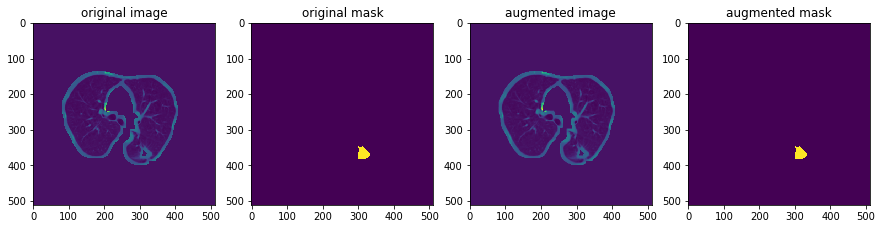

In [48]:
f, ax = plt.subplots(1,4,figsize=(15,15))
ax[0].imshow(image0[:,:,0])
ax[1].imshow(mask0[:,:,0])
ax[2].imshow(augment0[0,:,:])
ax[3].imshow(mask_aug[0,:,:])
ax[0].set_title("original image")
ax[1].set_title("original mask")
ax[2].set_title("augmented image")
ax[3].set_title("augmented mask")

In [13]:
image0 = image0.reshape(512,512,1)

In [8]:
mask0 = mask0.reshape(512,512,1)